In [1]:
import math 
from PIL import Image
import numpy as np
from pylab import *
import matplotlib.cm as cm
import scipy as sp
import random
from collections import defaultdict
import operator
from skimage import io,color
import cv2
import sys

In [12]:
img=cv2.imread("./Input/1.png",0)

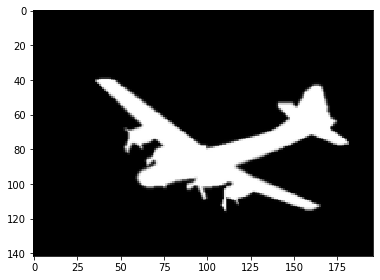

In [13]:
io.imshow(img)

In [14]:
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,grayImage = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

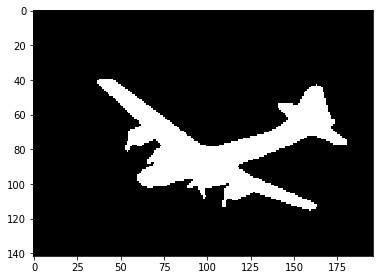

In [15]:
io.imshow(grayImage)

In [16]:
def encircle(image):
    
    row=image.shape[0]
    col=image.shape[1]
    outImg=[[[0,0,0] for i in range(col)] for j in range(row)]
    left=[0,100000]
    right=[0,-1]
    top=[100000,0]
    bottom=[-1,0]
    
    for i in range(row):
        for j in range(col):
            if image[i][j]==255:
                if j>=right[1]:
                    right=[i,j+1]
                if j<=left[1]:
                    left=[i,j-1]
                if i<=top[0]:
                    top=[i-1,j]
                if i>=bottom[0]:
                    bottom=[i+1,j]
                    
#             print(i,j)
            outImg[i][j]=[image[i][j],image[i][j],image[i][j]]
                
            
    outImg[right[0]][right[1]]=[255,0,0]
    outImg[left[0]][left[1]]=[255,0,0]
    outImg[top[0]][top[1]]=[255,0,0]
    outImg[bottom[0]][bottom[1]]=[255,0,0]
    
    
    center=[]
    minDist=float("inf")
    for i in range(top[0],bottom[0]+1):
        for j in range(left[1],right[1]):
            maxDist=float("-inf")
            dr=sqrt(pow(i-right[0],2)+pow(j-right[1],2))
            dt=sqrt(pow(i-top[0],2)+pow(j-top[1],2))
            dl=sqrt(pow(i-left[0],2)+pow(j-left[1],2))
            db=sqrt(pow(i-bottom[0],2)+pow(j-bottom[1],2))
            maxDist=max(maxDist,max(dr,max(dt,max(dl,db))))
            if maxDist<minDist:
                minDist=maxDist
                center=[i,j]
    minDist=int(minDist)
    for i in range(row):
        for j in range(col):
            dist=int(sqrt(pow(i-center[0],2)+pow(j-center[1],2)))
            if dist==minDist:
                outImg[i][j]=[255,0,0]
    
    outImg[center[0]][center[1]]=[255,0,0]
    outImg[center[0]+1][center[1]]=[255,0,0]
    outImg[center[0]-1][center[1]]=[255,0,0]
    outImg[center[0]][center[1]+1]=[255,0,0]
    outImg[center[0]][center[1]-1]=[255,0,0]
    outImg[center[0]+1][center[1]+1]=[255,0,0]
    outImg[center[0]+1][center[1]-1]=[255,0,0]
    outImg[center[0]-1][center[1]-1]=[255,0,0]
    outImg[center[0]-1][center[1]+1]=[255,0,0]
    outImg=np.asarray(outImg,dtype=uint8)
    return outImg
    

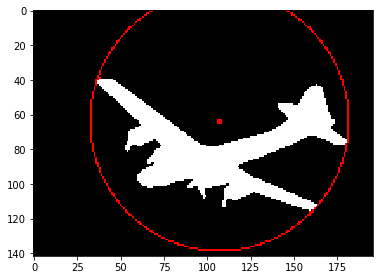

In [17]:
io.imshow(encircle(grayImage))

In [20]:
names=["./Input/1.png","./Input/2.png","Input/3.png"]
# ,"Input/3.png","Input/4.png","Input/5.png"]

In [21]:
for i in range(len(names)):
    st=names[i]
    inp=cv2.imread(st,0)
    blur = cv2.GaussianBlur(inp,(5,5),0)
    ret3,gray = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    output=encircle(gray)
    plt.imsave('./Output/'+str(i+1)+'.png',output)